In [1]:
from Bi_LSTM import *
from Yelp_Manager import *

In [2]:
start = time.time()
yelp = Yelp_Manager(nrows=100000)
yelp.initialize(load_text=False, load_vectors=True)
yelp.preprocess_dataset(clean=False)

Saving Spacy Embedding: :   0%|                                                           | 0/10 [00:05<?, ?it/s]


In [3]:
yelp.y = yelp.y.drop(columns=['stars'])

In [4]:
# v = CountVectorizer(ngram_range=(1, 1))
# yelp.x = pd(v.fit_transform(yelp.x["text"])
yelp.process_dataset(vectorize=False)
end = time.time()
print(end-start)

9.367109298706055


In [5]:
manager = Bi_LSTM_Manager(hidden_layers=512)

In [6]:
all_losses = manager.train_model(yelp.X_train, yelp.y_train, loss_function=1, optimizer=0, epoch=1)
# 100000 datasets parameter(xtrain, ytrain, loss_function=0, optimizer=0, epoch=2) #1 14mins

Loss: 0.0033: 100%|███████████████████████████████████████████████████████| 80000/80000 [07:29<00:00, 178.15it/s]

Epoch: 1  Complete
End time:449 seconds


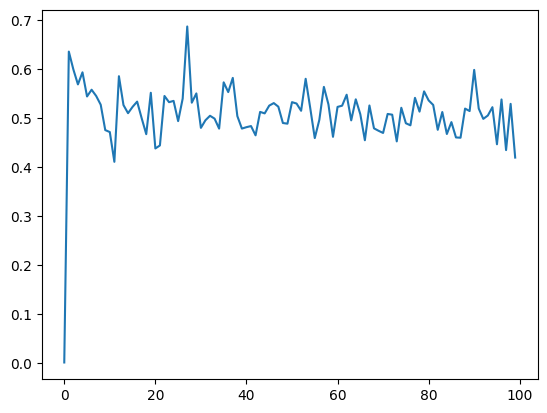

In [7]:
for losses in all_losses:
    manager.plot_loss_graph(losses)

In [8]:
x_dataset = yelp.X_train
y_dataset = yelp.y_train

In [9]:
y_preds = manager.predict(yelp.X_test)

BI_LSTM Prediction:   0%|                                                              | 0/20000 [00:00<?, ?it/s]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [13]:
x_dataset = yelp.X_test

start = time.time()
y_pred = pd.DataFrame()
#         stars = []
useful = []
funny = []
cool = []

i_tqdm = tqdm(range(1, len(x_dataset) + 1))
i_tqdm.set_description('BI_LSTM Prediction')

for row_idx in range(len(x_dataset)):
    manager.model.zero_grad()
    sentence_vector_tensor = manager.tensor_vector(x_dataset['vectors'].iloc[row_idx])
    pred = manager.model(sentence_vector_tensor).detach().numpy()

#             stars.append(round(pred[0][0]))
    useful.append(round(pred[0][0]))
    funny.append(round(pred[1][0]))
    cool.append(round(pred[2][0]))

    i_tqdm.update(1)

#         y_pred['stars'] = stars
y_pred['useful'] = useful
y_pred['funny'] = funny
y_pred['cool'] = cool

end = time.time()
print("End time:%d" % (time.time()-start), "seconds")
i_tqdm.close()
y_pred


BI_LSTM Prediction:  38%|██████████████████▌                              | 7576/20000 [00:07<00:11, 1092.27it/s]


BI_LSTM Prediction:  77%|████████████████████████████████████▊           | 15342/20000 [00:14<00:04, 1124.39it/s]


BI_LSTM Prediction: 100%|████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1078.00it/s]

End time:18 seconds


,useful,funny,cool
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
19995,0,0,0
19996,0,0,0
19997,0,0,0
19998,0,0,0


In [12]:
manager.classification_report(yelp.y_test, y_preds)

NameError: name 'y_preds' is not defined

In [14]:
scores = manager.f1_score(yelp.y_test, y_pred, average='macro')

In [15]:
print("f1-score(Macro)\n")
for key in scores:
    print(key, ": %.2f" % (scores[key]*100), "%")

f1-score(Macro)

useful : 2.43 %
funny : 4.39 %
cool : 4.45 %


In [16]:
yelp.save_BiLSTM_model(manager.model)